# Susceptible-Influenced-Deinfluenced Independnt Cascade Model 

@Hubery Hu

Basic Implementation


In [101]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

Model construction object.

All three edges are assigned random weights. The graph is a basic digraph with n node numbered 0 to n-1. And for any pair of nodes, they have edge_prob chance to be connected (one way). Also contains code for state transiinos and cascade process.

In [102]:
class InfluenceDeinfluenceModel:
    def __init__(self, num_nodes, edge_prob):
        self.graph = nx.DiGraph()
        self.graph.add_nodes_from(range(num_nodes))
        self.init_edges(edge_prob)
        self.init_edge_weights()

    def init_edges(self, edge_prob):
        for i in self.graph.nodes:
            for j in self.graph.nodes:
                if i != j and random.random() < edge_prob:
                    self.graph.add_edge(i, j)

    def init_edge_weights(self):
        for u, v in self.graph.edges:
            p_is = random.uniform(0, 1)
            p_ds = random.uniform(0, 1)
            p_di = random.uniform(0, 1)
            self.graph[u][v]['p_is'] = p_is
            self.graph[u][v]['p_ds'] = p_ds
            self.graph[u][v]['p_di'] = p_di

    def set_initial_states(self):
        nx.set_node_attributes(self.graph, 'S', 'state')

model = InfluenceDeinfluenceModel(num_nodes=10, edge_prob=0.1)
model.set_initial_states()

# Display the graph edges with weights
for u, v in model.graph.edges:
    print(f"Edge ({u} -> {v}): p_is = {model.graph[u][v]['p_is']}, p_ds = {model.graph[u][v]['p_ds']}, p_di = {model.graph[u][v]['p_di']}")

Edge (1 -> 8): p_is = 0.3881984837156498, p_ds = 0.5884342955879094, p_di = 0.7637190019677388
Edge (3 -> 8): p_is = 0.9374221476556853, p_ds = 0.3561295242546145, p_di = 0.24477633326024573
Edge (4 -> 5): p_is = 0.48726377318329406, p_ds = 0.998860464448877, p_di = 0.9737764100581539
Edge (4 -> 9): p_is = 0.5421862322165593, p_ds = 0.49508523972450014, p_di = 0.5584124804845334
Edge (5 -> 4): p_is = 0.6862962094263237, p_ds = 0.38675204654150575, p_di = 0.28978326112959085
Edge (6 -> 8): p_is = 0.051158305844086094, p_ds = 0.11945016128977737, p_di = 0.9657334650950334
Edge (7 -> 9): p_is = 0.5688116304009168, p_ds = 0.21642627102483658, p_di = 0.42699839074151535
Edge (8 -> 3): p_is = 0.8722433137650615, p_ds = 0.40414838154593413, p_di = 0.6729261511599764
Edge (9 -> 7): p_is = 0.4870069314782657, p_ds = 0.3614299198206399, p_di = 0.5170031087132189


Model contains code for state transiinos and cascade process. 

In [103]:
class InfluenceDeinfluenceModel:
    def __init__(self, num_nodes, edge_prob):
        self.graph = nx.DiGraph()
        self.graph.add_nodes_from(range(num_nodes))
        self.init_edges(edge_prob)
        self.init_edge_weights()
        self.set_initial_states()
        self.activated_edges = set()

    def init_edges(self, edge_prob):
        for i in self.graph.nodes:
            for j in self.graph.nodes:
                if i != j and random.random() < edge_prob:
                    self.graph.add_edge(i, j)

    def init_edge_weights(self):
        for u, v in self.graph.edges:
            p_is = random.uniform(0, 1)
            p_ds = random.uniform(0, 1)
            p_di = random.uniform(0, 1)
            self.graph[u][v]['p_is'] = p_is
            self.graph[u][v]['p_ds'] = p_ds
            self.graph[u][v]['p_di'] = p_di

    def set_initial_states(self):
        nx.set_node_attributes(self.graph, 'S', 'state')

    def set_influencers(self, influencers):
        for node in influencers:
            self.graph.nodes[node]['state'] = 'I'

    def set_deinfluencers(self, deinfluencers):
        for node in deinfluencers:
            self.graph.nodes[node]['state'] = 'D'
    
    def spread_influence(self):
        new_influenced = set()
        new_deinfluenced = set()

        nodes = list(self.graph.nodes)
        random.shuffle(nodes)  # Shuffle the nodes to process them in a random order

        for node in nodes:
            if self.graph.nodes[node]['state'] == 'I':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if (edge not in self.activated_edges and 
                        self.graph.nodes[neighbor]['state'] == 'S' and 
                        random.random() < self.graph[node][neighbor]['p_is']):
                        new_influenced.add(neighbor)
                        self.activated_edges.add(edge)
            elif self.graph.nodes[node]['state'] == 'D':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if edge not in self.activated_edges:
                        if (self.graph.nodes[neighbor]['state'] == 'S' and 
                            random.random() < self.graph[node][neighbor]['p_ds']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)
                        elif (self.graph.nodes[neighbor]['state'] == 'I' and 
                              random.random() < self.graph[node][neighbor]['p_di']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)

        for node in new_influenced:
            self.graph.nodes[node]['state'] = 'I'
        for node in new_deinfluenced:
            self.graph.nodes[node]['state'] = 'D'

    def run_cascade(self, steps):
        for _ in range(steps):
            self.spread_influence()

    def run_cascade(self, steps):
        for _ in range(steps):
            self.spread_influence()

# Example usage:
num_nodes = 20
edge_prob = 0.1
model = InfluenceDeinfluenceModel(num_nodes, edge_prob)
model.set_initial_states()
model.set_influencers([0, 1])
model.set_deinfluencers([2])

# Run the cascade process for a number of steps
model.run_cascade(steps=5)

# Display final states of nodes
for node in model.graph.nodes:
    print(f"Node {node}: State = {model.graph.nodes[node]['state']}")


Node 0: State = D
Node 1: State = I
Node 2: State = D
Node 3: State = D
Node 4: State = D
Node 5: State = S
Node 6: State = I
Node 7: State = D
Node 8: State = S
Node 9: State = S
Node 10: State = D
Node 11: State = S
Node 12: State = D
Node 13: State = D
Node 14: State = D
Node 15: State = S
Node 16: State = S
Node 17: State = D
Node 18: State = D
Node 19: State = S


With evlutionary history and graph plotting feature

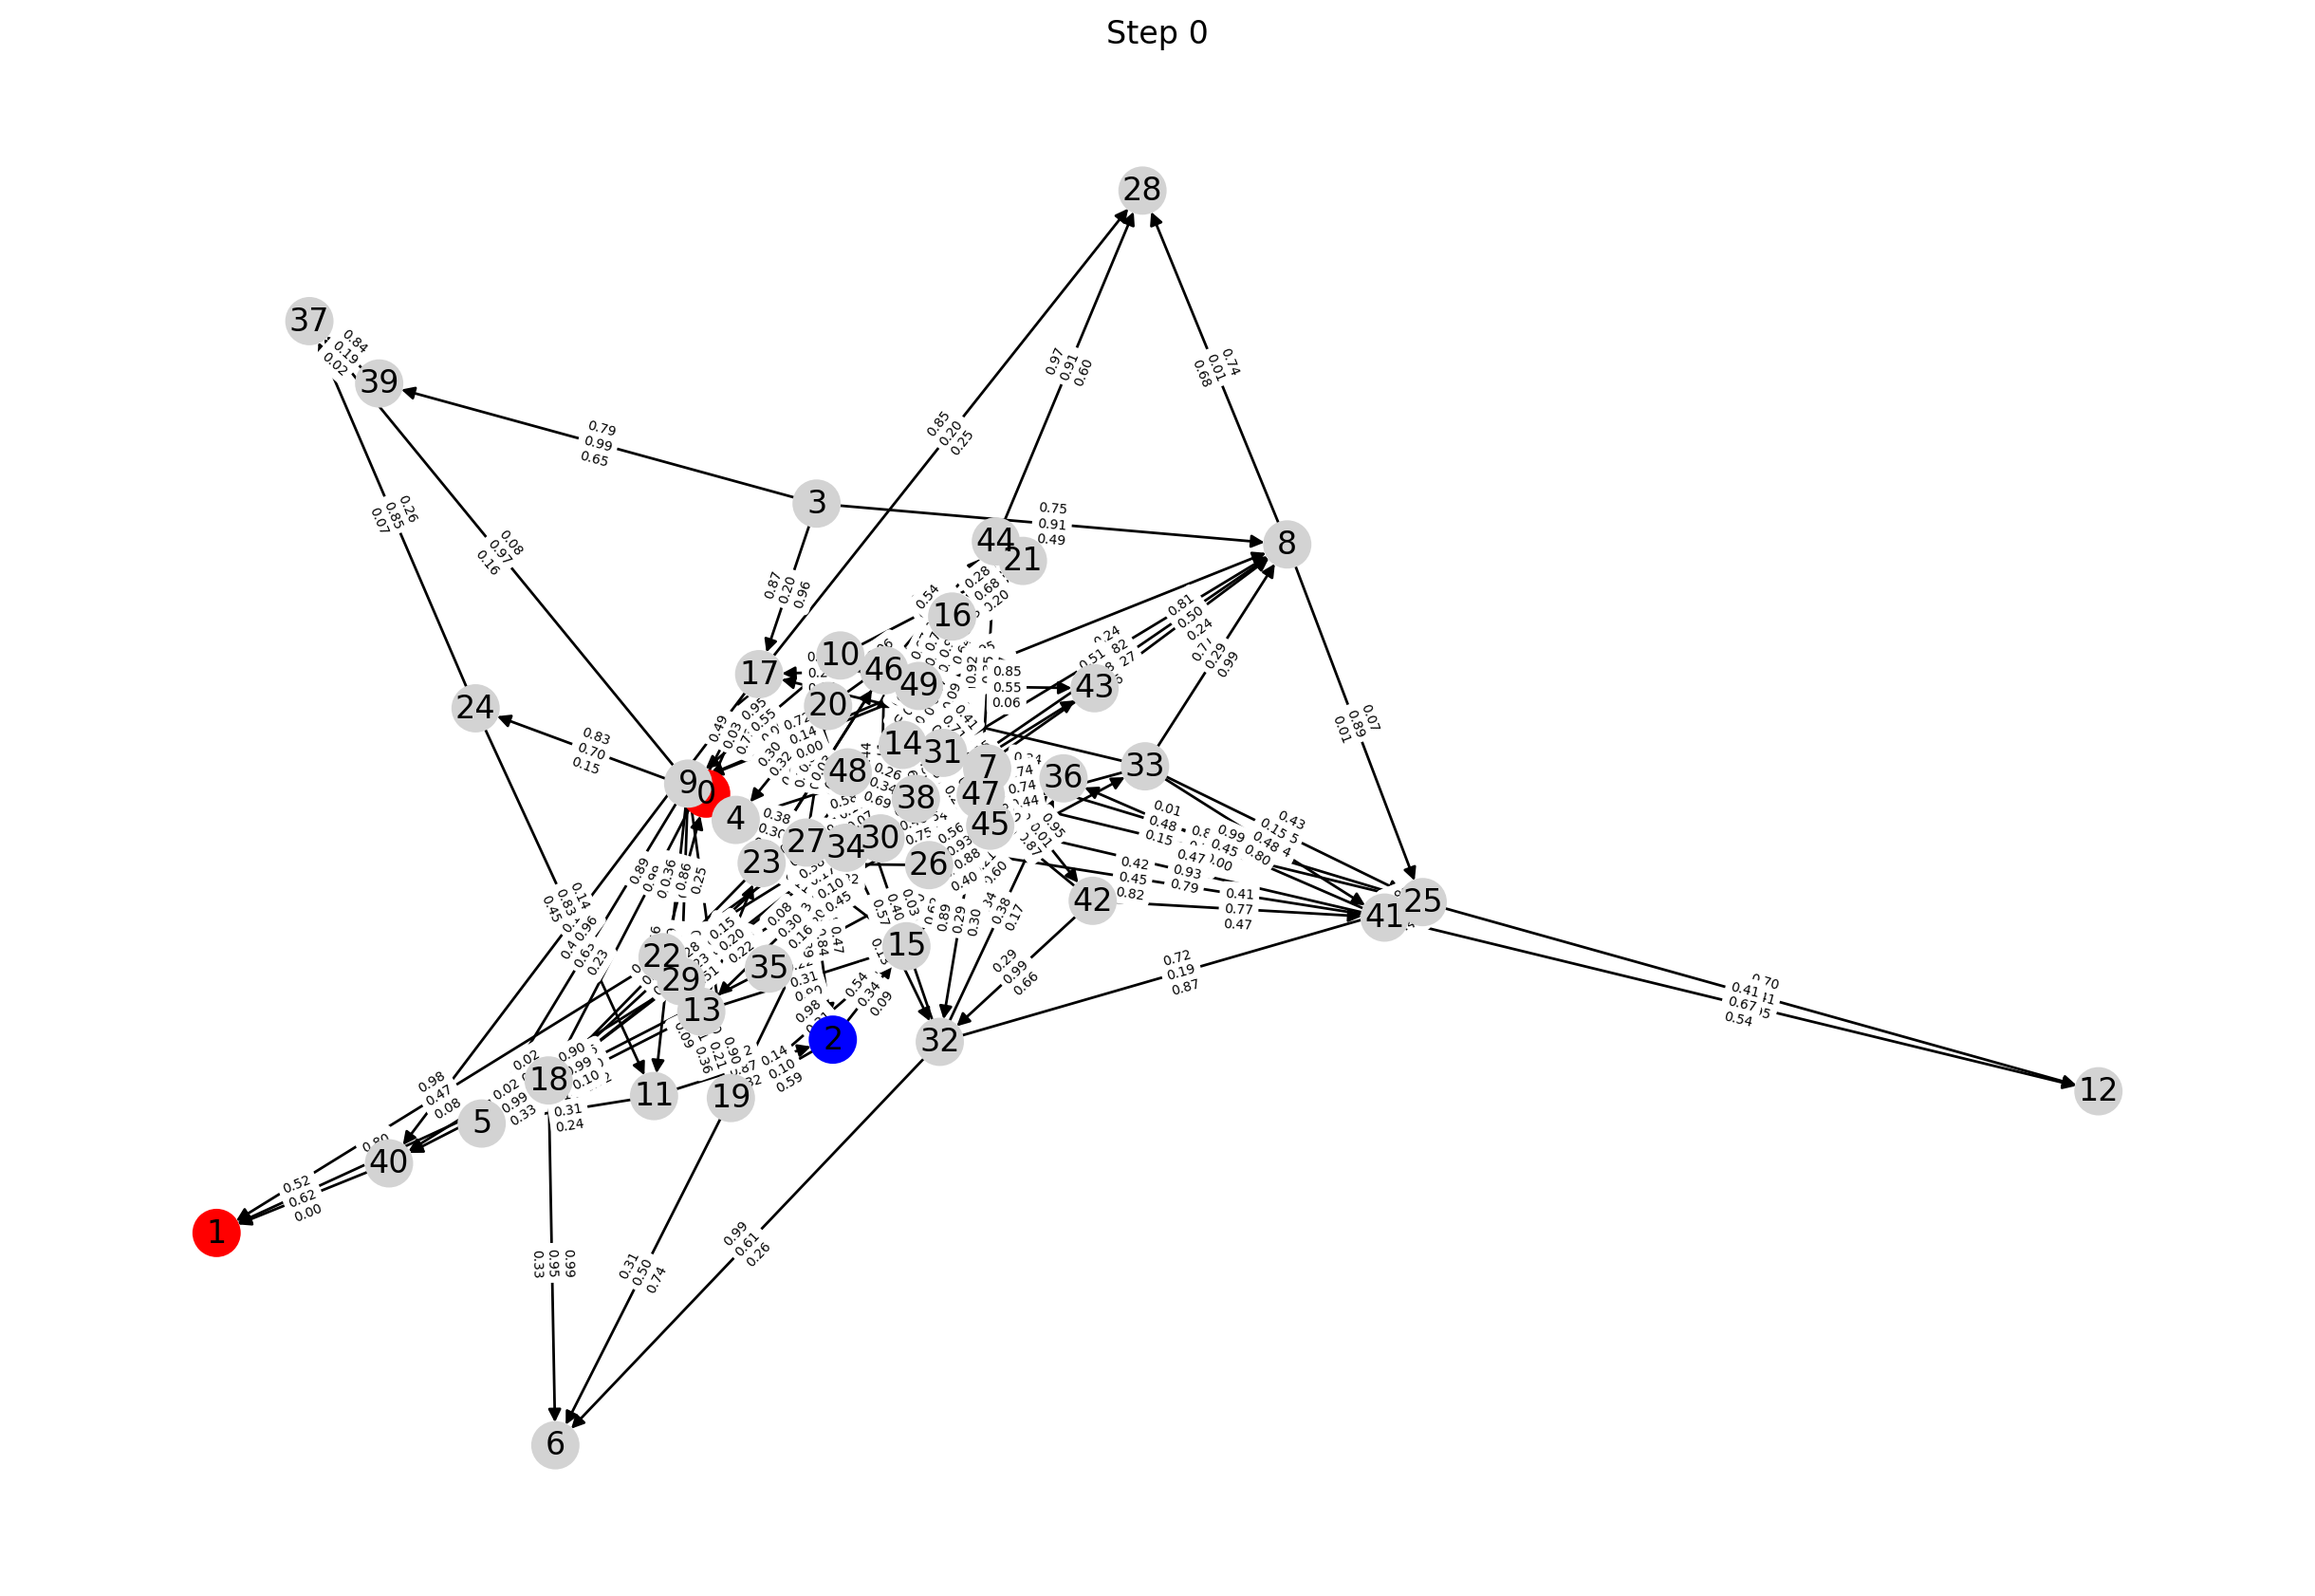

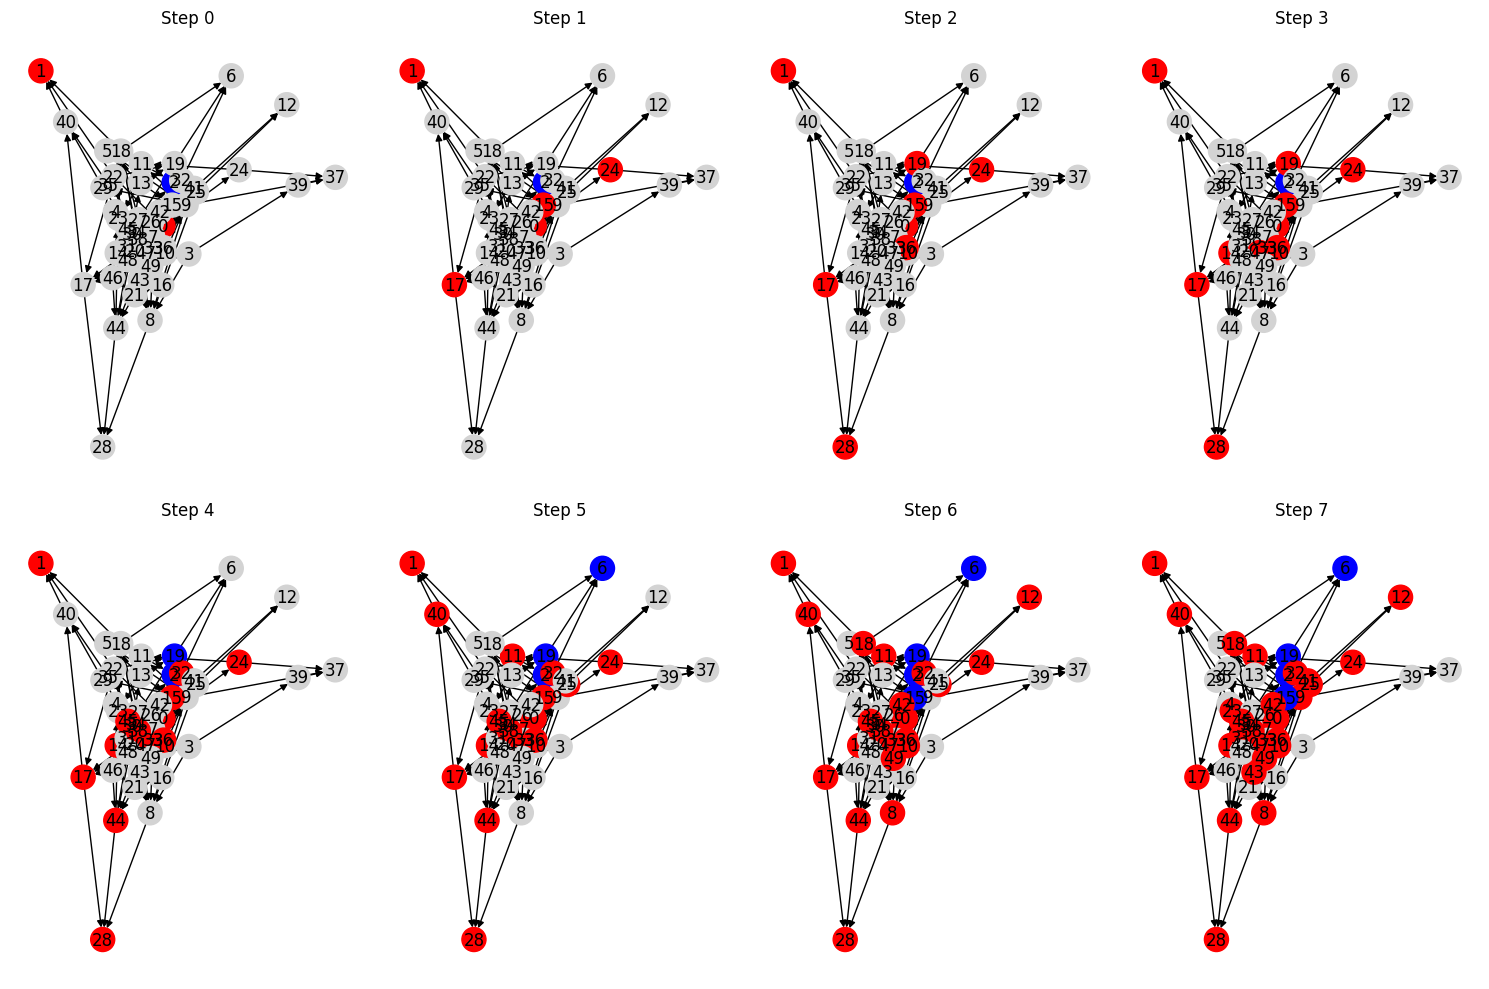

In [104]:
class InfluenceDeinfluenceModel:
    def __init__(self, num_nodes, edge_prob):
        self.graph = nx.DiGraph()
        self.graph.add_nodes_from(range(num_nodes))
        self.init_edges(edge_prob)
        self.init_edge_weights()
        self.set_initial_states()
        self.history = []  # To store the history of node states
        self.activated_edges = set()

    def init_edges(self, edge_prob):
        for i in self.graph.nodes:
            for j in self.graph.nodes:
                if i != j and random.random() < edge_prob:
                    self.graph.add_edge(i, j)

    def init_edge_weights(self):
        for u, v in self.graph.edges:
            p_is = random.uniform(0, 1)
            p_ds = random.uniform(0, 1)
            p_di = random.uniform(0, 1)
            #p_di = 1 - (1 - p_is)**1.5  # c is chosen to be 1.5 for demonstration
            self.graph[u][v]['p_is'] = p_is
            self.graph[u][v]['p_ds'] = p_ds
            self.graph[u][v]['p_di'] = p_di

    def set_initial_states(self):
        nx.set_node_attributes(self.graph, 'S', 'state')

    def set_influencers(self, influencers):
        for node in influencers:
            self.graph.nodes[node]['state'] = 'I'

    def set_deinfluencers(self, deinfluencers):
        for node in deinfluencers:
            self.graph.nodes[node]['state'] = 'D'
    
    def spread_influence(self):
        new_influenced = set()
        new_deinfluenced = set()

        nodes = list(self.graph.nodes)
        random.shuffle(nodes)  # Shuffle the nodes to process them in a random order

        for node in nodes:
            if self.graph.nodes[node]['state'] == 'I':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if (edge not in self.activated_edges and 
                        self.graph.nodes[neighbor]['state'] == 'S' and 
                        random.random() < self.graph[node][neighbor]['p_is']):
                        new_influenced.add(neighbor)
                        self.activated_edges.add(edge)
            elif self.graph.nodes[node]['state'] == 'D':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if edge not in self.activated_edges:
                        if (self.graph.nodes[neighbor]['state'] == 'S' and 
                            random.random() < self.graph[node][neighbor]['p_ds']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)
                        elif (self.graph.nodes[neighbor]['state'] == 'I' and 
                              random.random() < self.graph[node][neighbor]['p_di']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)

        for node in new_influenced:
            self.graph.nodes[node]['state'] = 'I'
        for node in new_deinfluenced:
            self.graph.nodes[node]['state'] = 'D'
            
        self.store_history()  # Store the state of nodes after each step


    def store_history(self):
        # Store a copy of the current state of all nodes
        current_state = {node: self.graph.nodes[node]['state'] for node in self.graph.nodes}
        self.history.append(current_state)

    def run_cascade(self, steps):
        self.store_history()  # Store the initial state
        for _ in range(steps):
            self.spread_influence()

    def get_history(self):
        return self.history

    def display_graph(self, step):
        if step < 0 or step >= len(self.history):
            print(f"Step {step} is out of range")
            return

        current_state = self.history[step]
        color_map = ['red' if current_state[node] == 'I' else 'blue' if current_state[node] == 'D' else 'lightgrey' for node in self.graph.nodes]

        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(12, 8), dpi=200)  # Increase the figure size and DPI
        nx.draw(self.graph, pos, with_labels=True, node_color=color_map, arrows=True)
        edge_labels = {(u, v): f"{self.graph[u][v]['p_is']:.2f}\n{self.graph[u][v]['p_ds']:.2f}\n{self.graph[u][v]['p_di']:.2f}" for u, v in self.graph.edges}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=5)
        plt.title(f'Step {step}')
        plt.show()


    def display_graphs_grid(self):
        steps = len(self.history)
        cols = 4
        rows = (steps + cols - 1) // cols
        fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axs = axs.flatten()

        pos = nx.spring_layout(self.graph)
        for i in range(steps):
            ax = axs[i]
            current_state = self.history[i]
            color_map = ['red' if current_state[node] == 'I' else 'blue' if current_state[node] == 'D' else 'lightgrey' for node in self.graph.nodes]

            nx.draw(self.graph, pos, ax=ax, with_labels=True, node_color=color_map, arrows=True)
            edge_labels = {(u, v): f"{self.graph[u][v]['p_is']:.2f}\n{self.graph[u][v]['p_ds']:.2f}\n{self.graph[u][v]['p_di']:.2f}" for u, v in self.graph.edges}
            #nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=4)
            ax.set_title(f'Step {i}')

        for j in range(steps, len(axs)):
            fig.delaxes(axs[j])

        plt.tight_layout()
        plt.show()

# Example usage:
num_nodes = 50
edge_prob = 0.05
model = InfluenceDeinfluenceModel(num_nodes, edge_prob)
model.set_initial_states()
model.set_influencers([0, 1])
model.set_deinfluencers([2])

# Run the cascade process for a number of steps
model.run_cascade(steps=7)

# Display the graph for a specific step
model.display_graph(step=0)
# model.display_graph(step=1)
# model.display_graph(step=2)

# Display the evolution of the graph in a grid
model.display_graphs_grid()


Instead of generating model ourselves, we can leverage exisiting graph model

In [105]:
import networkx as nx
import random
import matplotlib.pyplot as plt

class InfluenceDeinfluenceModel:
    def __init__(self, graph):
        self.graph = graph
        self.init_edge_weights()
        self.set_initial_states()
        self.history = []  # To store the history of node states
        self.activated_edges = set()

    def init_edge_weights(self):
        for u, v in self.graph.edges:
            p_is = random.uniform(0, 1)
            p_ds = random.uniform(0, 1)
            p_di = 1 - (1 - p_is)**1.5  # c is chosen to be 1.5 for demonstration
            self.graph[u][v]['p_is'] = p_is
            self.graph[u][v]['p_ds'] = p_ds
            self.graph[u][v]['p_di'] = p_di

    def set_initial_states(self):
        nx.set_node_attributes(self.graph, 'S', 'state')

    def set_influencers(self, influencers):
        for node in influencers:
            self.graph.nodes[node]['state'] = 'I'

    def set_deinfluencers(self, deinfluencers):
        for node in deinfluencers:
            self.graph.nodes[node]['state'] = 'D'

    def spread_influence(self):
        new_influenced = set()
        new_deinfluenced = set()

        nodes = list(self.graph.nodes)
        random.shuffle(nodes)  # Shuffle the nodes to process them in a random order

        for node in nodes:
            if self.graph.nodes[node]['state'] == 'I':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if (edge not in self.activated_edges and 
                        self.graph.nodes[neighbor]['state'] == 'S' and 
                        random.random() < self.graph[node][neighbor]['p_is']):
                        new_influenced.add(neighbor)
                        self.activated_edges.add(edge)
            elif self.graph.nodes[node]['state'] == 'D':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if edge not in self.activated_edges:
                        if (self.graph.nodes[neighbor]['state'] == 'S' and 
                            random.random() < self.graph[node][neighbor]['p_ds']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)
                        elif (self.graph.nodes[neighbor]['state'] == 'I' and 
                              random.random() < self.graph[node][neighbor]['p_di']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)

        for node in new_influenced:
            self.graph.nodes[node]['state'] = 'I'
        for node in new_deinfluenced:
            self.graph.nodes[node]['state'] = 'D'
            
        self.store_history()  # Store the state of nodes after each step

    def store_history(self):
        # Store a copy of the current state of all nodes
        current_state = {node: self.graph.nodes[node]['state'] for node in self.graph.nodes}
        self.history.append(current_state)

    def run_cascade(self, steps):
        self.store_history()  # Store the initial state
        for _ in range(steps):
            self.spread_influence()

    def get_history(self):
        return self.history

    def display_graph(self, step):
        if step < 0 or step >= len(self.history):
            print(f"Step {step} is out of range")
            return

        current_state = self.history[step]
        color_map = ['red' if current_state[node] == 'I' else 'blue' if current_state[node] == 'D' else 'lightgrey' for node in self.graph.nodes]

        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(12, 8), dpi=200)  # Increase the figure size and DPI
        nx.draw(self.graph, pos, with_labels=True, node_color=color_map, arrows=True)
        edge_labels = {(u, v): f"{self.graph[u][v]['p_is']:.2f}\n{self.graph[u][v]['p_ds']:.2f}\n{self.graph[u][v]['p_di']:.2f}" for u, v in self.graph.edges}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=5)
        plt.title(f'Step {step}')
        plt.show()

    def display_graphs_grid(self):
        steps = len(self.history)
        cols = 3
        rows = (steps + cols - 1) // cols
        fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axs = axs.flatten()

        pos = nx.spring_layout(self.graph)
        for i in range(steps):
            ax = axs[i]
            current_state = self.history[i]
            color_map = ['red' if current_state[node] == 'I' else 'blue' if current_state[node] == 'D' else 'lightgrey' for node in self.graph.nodes]

            nx.draw(self.graph, pos, ax=ax, with_labels=True, node_color=color_map, arrows=True)
            edge_labels = {(u, v): f"{self.graph[u][v]['p_is']:.2f}\n{self.graph[u][v]['p_ds']:.2f}\n{self.graph[u][v]['p_di']:.2f}" for u, v in self.graph.edges}
            #nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=8)
            ax.set_title(f'Step {i}')

        for j in range(steps, len(axs)):
            fig.delaxes(axs[j])

        plt.tight_layout()
        plt.show()


def generate_and_run_model(graph_type, num_nodes, steps, edge_prob=None, k=None, p=None, m=None):
    if graph_type == 'erdos_renyi':
        graph = nx.erdos_renyi_graph(num_nodes, edge_prob, directed=True)
    elif graph_type == 'watts_strogatz':
        graph = nx.watts_strogatz_graph(num_nodes, k, p).to_directed()
    elif graph_type == 'barabasi_albert':
        graph = nx.barabasi_albert_graph(num_nodes, m).to_directed()
    else:
        raise ValueError("Unsupported graph type. Choose from 'erdos_renyi', 'watts_strogatz', or 'barabasi_albert'.")

    model = InfluenceDeinfluenceModel(graph)
    model.set_initial_states()
    model.set_influencers([0, 1,3])
    model.set_deinfluencers([2])
    model.run_cascade(steps)

    return model

def display_model_graphs(model):
    # for step in range(len(model.get_history())):
    #     model.display_graph(step)
    model.display_graphs_grid()



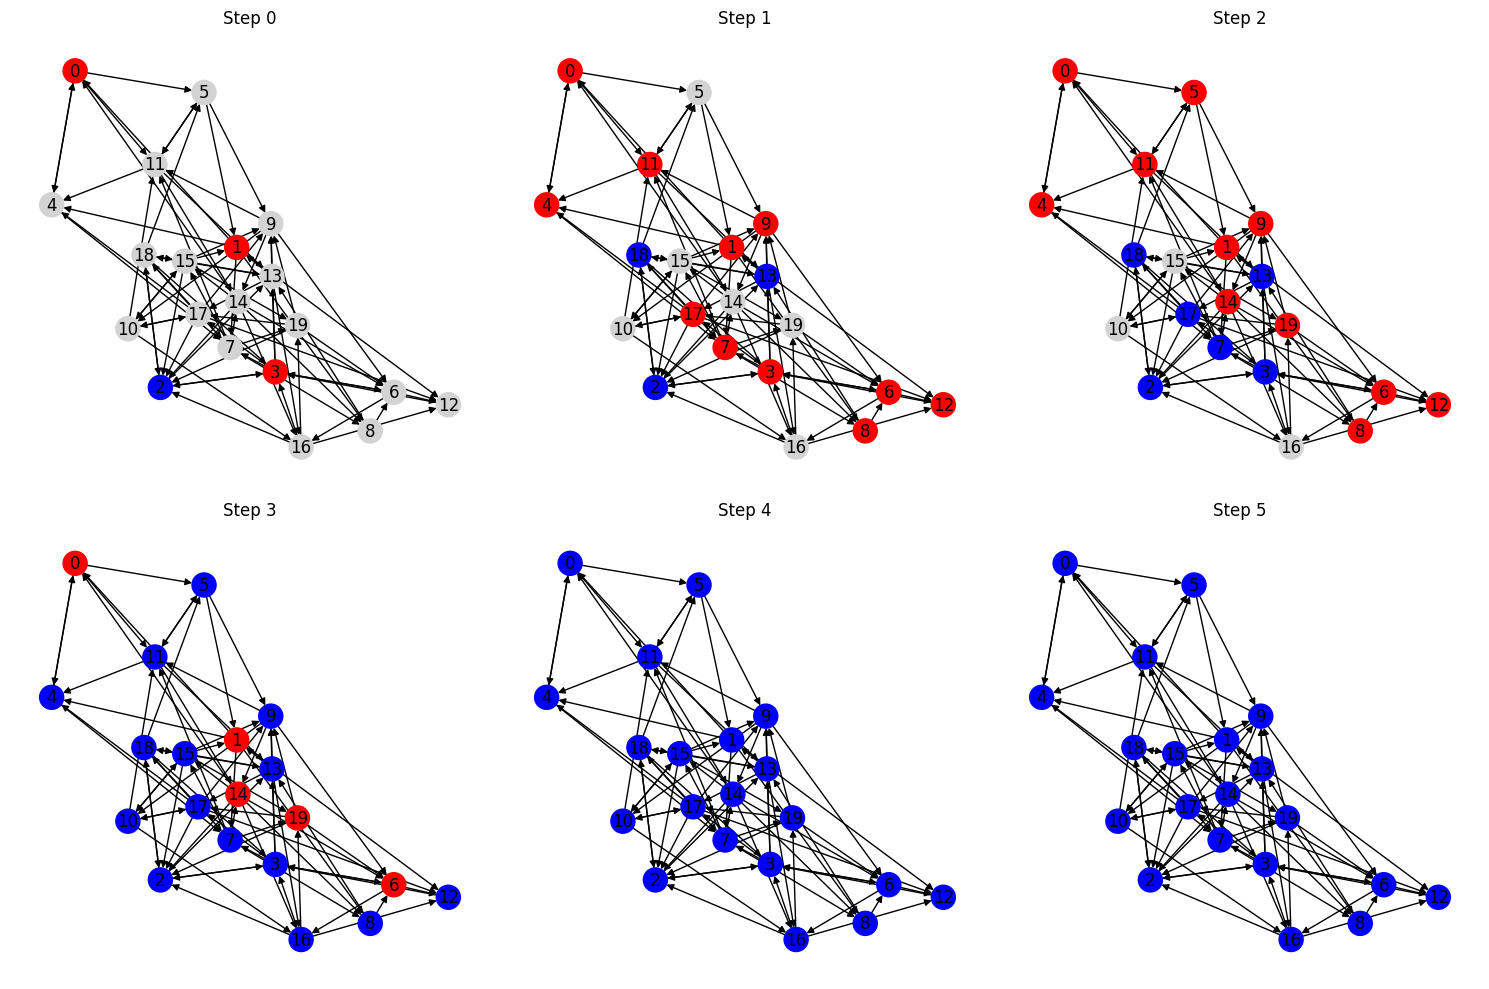

In [106]:
# Erdős-Rényi graph
model_er = generate_and_run_model('erdos_renyi', num_nodes=20, steps=5, edge_prob=0.2)
display_model_graphs(model_er)

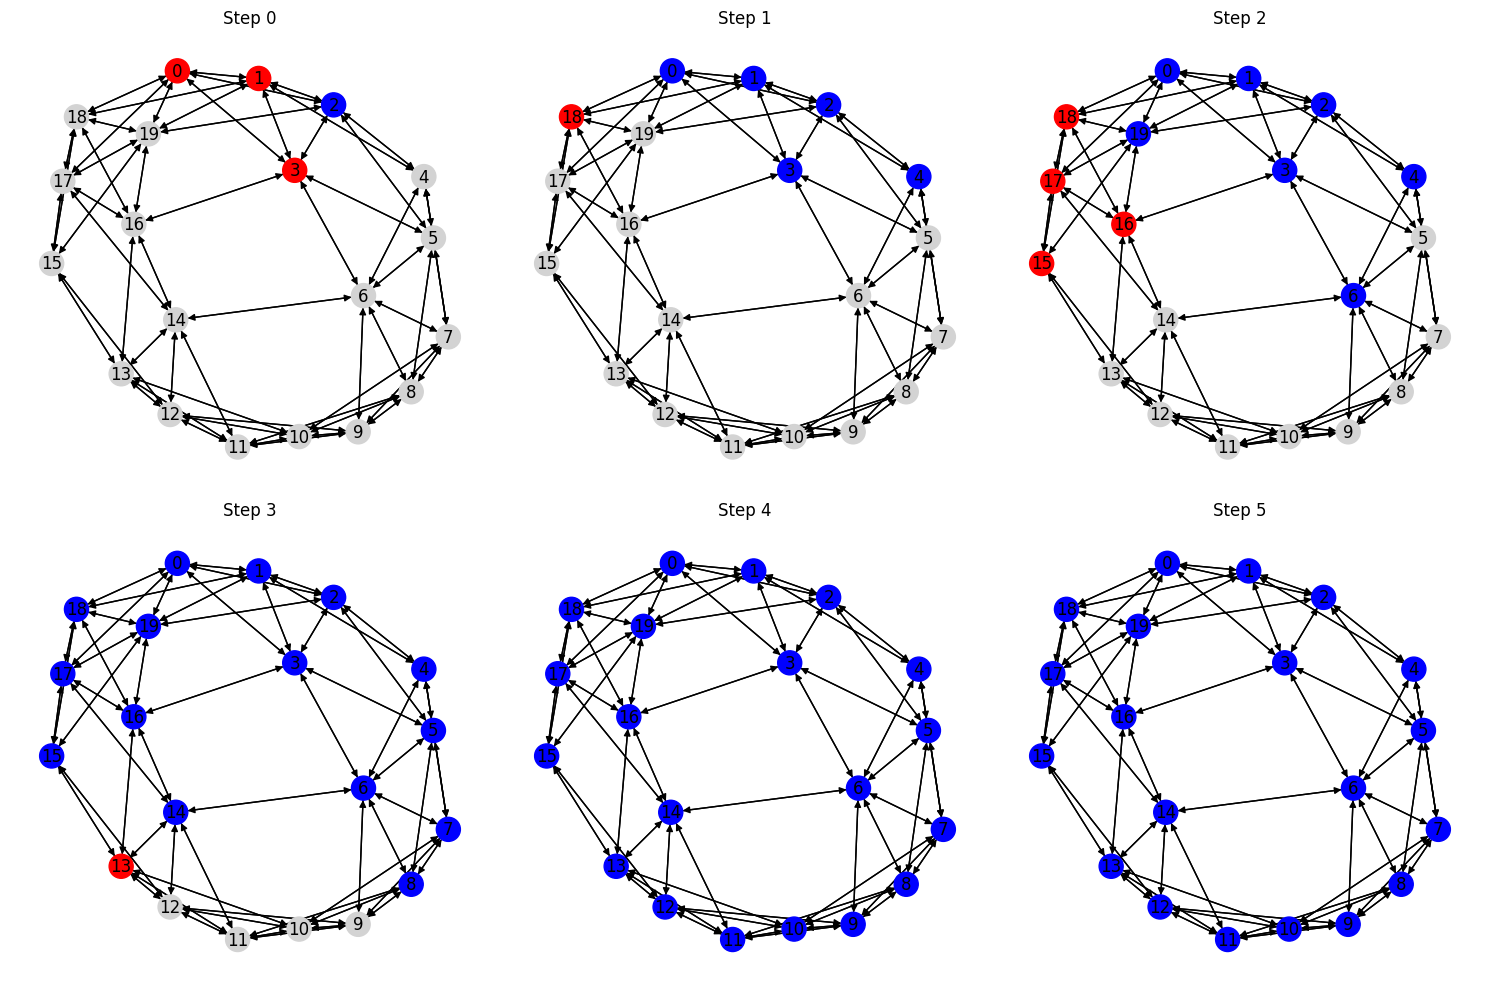

In [107]:

# Watts-Strogatz graph
model_ws = generate_and_run_model('watts_strogatz', num_nodes=20, steps=5, k=6, p=0.1)
display_model_graphs(model_ws)

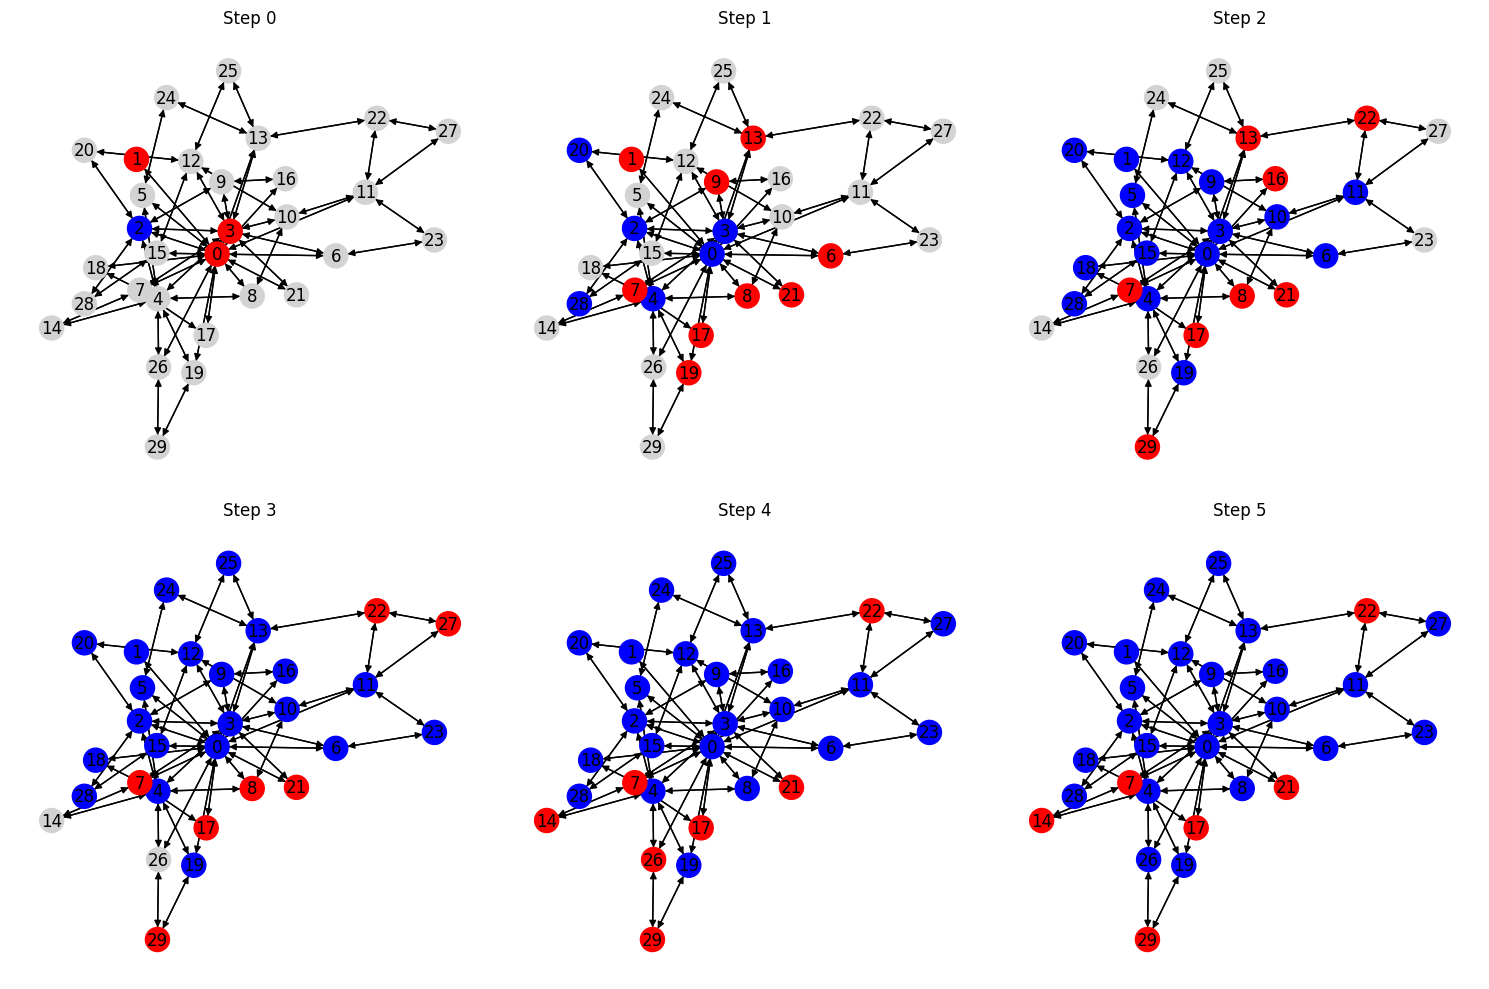

In [108]:
# Barabási-Albert graph
model_ba = generate_and_run_model('barabasi_albert', num_nodes=30, steps=5, m=2)
display_model_graphs(model_ba)

The complete code. The greedy algorithm is based on Algorithm 1 in Efficient Influence Maximization in Social Networks by Wei et al.

In [120]:
class InfluenceDeinfluenceModel:
    def __init__(self, graph):
        self.graph = graph
        self.init_edge_weights()
        self.set_initial_states()
        self.history = []  # To store the history of node states
        self.activated_edges = set()

    def init_edge_weights(self):
        for u, v in self.graph.edges:
            p_is = random.uniform(0, 1)
            p_ds = random.uniform(0, 1)
            p_di = 1 - (1 - p_is)**1.5  # c is chosen to be 1.5 for demonstration
            self.graph[u][v]['p_is'] = p_is
            self.graph[u][v]['p_ds'] = p_ds
            self.graph[u][v]['p_di'] = p_di

    def set_initial_states(self):
        nx.set_node_attributes(self.graph, 'S', 'state')

    def set_influencers(self, influencers):
        for node in influencers:
            self.graph.nodes[node]['state'] = 'I'

    def set_deinfluencers(self, deinfluencers):
        for node in deinfluencers:
            self.graph.nodes[node]['state'] = 'D'

    def spread_influence(self):
        new_influenced = set()
        new_deinfluenced = set()

        nodes = list(self.graph.nodes)
        random.shuffle(nodes)  # Shuffle the nodes to process them in a random order

        for node in nodes:
            if self.graph.nodes[node]['state'] == 'I':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if (edge not in self.activated_edges and 
                        self.graph.nodes[neighbor]['state'] == 'S' and 
                        random.random() < self.graph[node][neighbor]['p_is']):
                        new_influenced.add(neighbor)
                        self.activated_edges.add(edge)
            elif self.graph.nodes[node]['state'] == 'D':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if edge not in self.activated_edges:
                        if (self.graph.nodes[neighbor]['state'] == 'S' and 
                            random.random() < self.graph[node][neighbor]['p_ds']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)
                        elif (self.graph.nodes[neighbor]['state'] == 'I' and 
                              random.random() < self.graph[node][neighbor]['p_di']):
                            new_deinfluenced.add(neighbor)
                            self.activated_edges.add(edge)

        for node in new_influenced:
            self.graph.nodes[node]['state'] = 'I'
        for node in new_deinfluenced:
            self.graph.nodes[node]['state'] = 'D'
            
        self.store_history()  # Store the state of nodes after each step

    def influencer_spread_influence(self):
        
        nodes = list(self.graph.nodes)
        new_influenced = set()

        for node in nodes:
            if self.graph.nodes[node]['state'] == 'I':
                for neighbor in self.graph.neighbors(node):
                    edge = (node, neighbor)
                    if (edge not in self.activated_edges and 
                        self.graph.nodes[neighbor]['state'] == 'S' and 
                        random.random() < self.graph[node][neighbor]['p_is']):
                        new_influenced.add(neighbor)
                        self.activated_edges.add(edge)

        for node in new_influenced:
            self.graph.nodes[node]['state'] = 'I'
        
        #self.store_history()  # Store the state of nodes after each step

    def store_history(self):
        # Store a copy of the current state of all nodes
        current_state = {node: self.graph.nodes[node]['state'] for node in self.graph.nodes}
        self.history.append(current_state)

    def run_cascade(self, steps):
        self.store_history()  # Store the initial state
        for _ in range(steps):
            self.spread_influence()

    def run_cascade_influencer(self, steps):
        for _ in range(steps):
            self.influencer_spread_influence()

    def get_history(self):
        return self.history

    def display_graph(self, step):
        if step < 0 or step >= len(self.history):
            print(f"Step {step} is out of range")
            return

        current_state = self.history[step]
        color_map = ['red' if current_state[node] == 'I' else 'blue' if current_state[node] == 'D' else 'lightgrey' for node in self.graph.nodes]

        pos = nx.spring_layout(self.graph)
        plt.figure(figsize=(12, 8), dpi=200)  # Increase the figure size and DPI
        nx.draw(self.graph, pos, with_labels=True, node_color=color_map, arrows=True)
        edge_labels = {(u, v): f"{self.graph[u][v]['p_is']:.2f}\n{self.graph[u][v]['p_ds']:.2f}\n{self.graph[u][v]['p_di']:.2f}" for u, v in self.graph.edges}
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=5)
        plt.title(f'Step {step}')
        plt.show()

    def display_graphs_grid(self):
        steps = len(self.history)
        cols = 3
        rows = (steps + cols - 1) // cols
        fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axs = axs.flatten()

        pos = nx.spring_layout(self.graph)
        for i in range(steps):
            ax = axs[i]
            current_state = self.history[i]
            color_map = ['red' if current_state[node] == 'I' else 'blue' if current_state[node] == 'D' else 'lightgrey' for node in self.graph.nodes]

            nx.draw(self.graph, pos, ax=ax, with_labels=True, node_color=color_map, arrows=True)
            edge_labels = {(u, v): f"{self.graph[u][v]['p_is']:.2f}\n{self.graph[u][v]['p_ds']:.2f}\n{self.graph[u][v]['p_di']:.2f}" for u, v in self.graph.edges}
            #nx.draw_networkx_edge_labels(self.graph, pos, edge_labels=edge_labels, font_size=8)
            ax.set_title(f'Step {i}')

        for j in range(steps, len(axs)):
            fig.delaxes(axs[j])

        plt.tight_layout()
        plt.show()

    def evaluate_influence(self):
        """Evaluate the number of influenced nodes."""
        influenced_count = sum(1 for node in self.graph.nodes if self.graph.nodes[node]['state'] == 'I')
        return influenced_count
    
    def greedy_hill_climbing(self, k, steps, R=100):
        """Select k initial influencers using the improved greedy algorithm."""
        best_influencers = set()

        for _ in range(k):
            best_candidate = None
            best_score = -1

            for node in self.graph.nodes:
                if node in best_influencers:
                    continue
                
                # Temporarily add the candidate node to the set of influencers
                current_influencers = best_influencers | {node}
                total_score = 0

                for _ in range(R):
                    self.activated_edges.clear()  # Reset activated edges
                    self.set_initial_states()
                    self.set_influencers(current_influencers)
                    self.run_cascade_influencer(steps)
                    total_score += self.evaluate_influence()

                avg_score = total_score / R

                if avg_score > best_score:
                    best_score = avg_score
                    best_candidate = node

            if best_candidate is not None:
                best_influencers.add(best_candidate)

        return best_influencers
    
    # New Greedy Algorithm
    
    def generate_random_graph(self, p):
        random_graph = nx.DiGraph()
        for u, v in self.graph.edges:
            if random.random() < p:
                random_graph.add_edge(u, v)
        print("Random Graph Edges:", random_graph.edges())  # Debugging line
        return random_graph

    def compute_reachable_set(self, graph, seeds):
        reachable = set(seeds)
        to_explore = list(seeds)
        while to_explore:
            current = to_explore.pop()
            if current in graph:  # Ensure current node exists in the graph
                for neighbor in graph.neighbors(current):
                    if neighbor not in reachable:
                        reachable.add(neighbor)
                        to_explore.append(neighbor)
        print("Reachable Set for Seeds {}: {}".format(seeds, reachable))  # Debugging line
        return reachable

    def greedy_hill_climbing_new(self, k, R=20000, p=0.1):
        """Select k initial influencers using the NewGreedyIC algorithm."""
        S = []
        for _ in range(k):
            sv = {v: 0 for v in self.graph if v not in S}
            for _ in range(R):
                G_prime = self.generate_random_graph(p)
                reachable_S = self.compute_reachable_set(G_prime, S)
                for v in sv:
                    if v not in reachable_S:
                        reachable_v = self.compute_reachable_set(G_prime, {v})
                        sv[v] += len(reachable_v)
            for v in sv:
                sv[v] /= R
            best_candidate = max(sv, key=sv.get)
            S.append(best_candidate)
        return S


In [125]:
# Example usage
num_nodes = 50
steps = 10
edge_prob = 0.3
num_influencers = 3

def generate_and_run_model(graph_type, num_nodes, steps, edge_prob=None, k=None, p=None, m=None, num_influencers=3):
    if graph_type == 'erdos_renyi':
        graph = nx.erdos_renyi_graph(num_nodes, edge_prob, directed=True)
    elif graph_type == 'watts_strogatz':
        graph = nx.watts_strogatz_graph(num_nodes, k, p).to_directed()
    elif graph_type == 'barabasi_albert':
        graph = nx.barabasi_albert_graph(num_nodes, m).to_directed()
    else:
        raise ValueError("Unsupported graph type. Choose from 'erdos_renyi', 'watts_strogatz', or 'barabasi_albert'.")

    model = InfluenceDeinfluenceModel(graph)
    model.set_initial_states()
    initial_influencers = model.greedy_hill_climbing(num_influencers, steps)
    #initial_influencers = model.greedy_hill_climbing_new(num_influencers)
    print("Optimized Initial Influencers:", initial_influencers)
    
    model.activated_edges.clear()  # Reset activated edges
    model.set_initial_states()
    model.set_influencers(initial_influencers)
    model.set_deinfluencers([8])  # Example: Set a fixed deinfluencer
    model.run_cascade(steps)

    return model

def display_model_graphs(model):
    # for step in range(len(model.get_history())):
    #     model.display_graph(step)
    model.display_graphs_grid()

Optimized Initial Influencers: {0, 1, 2}


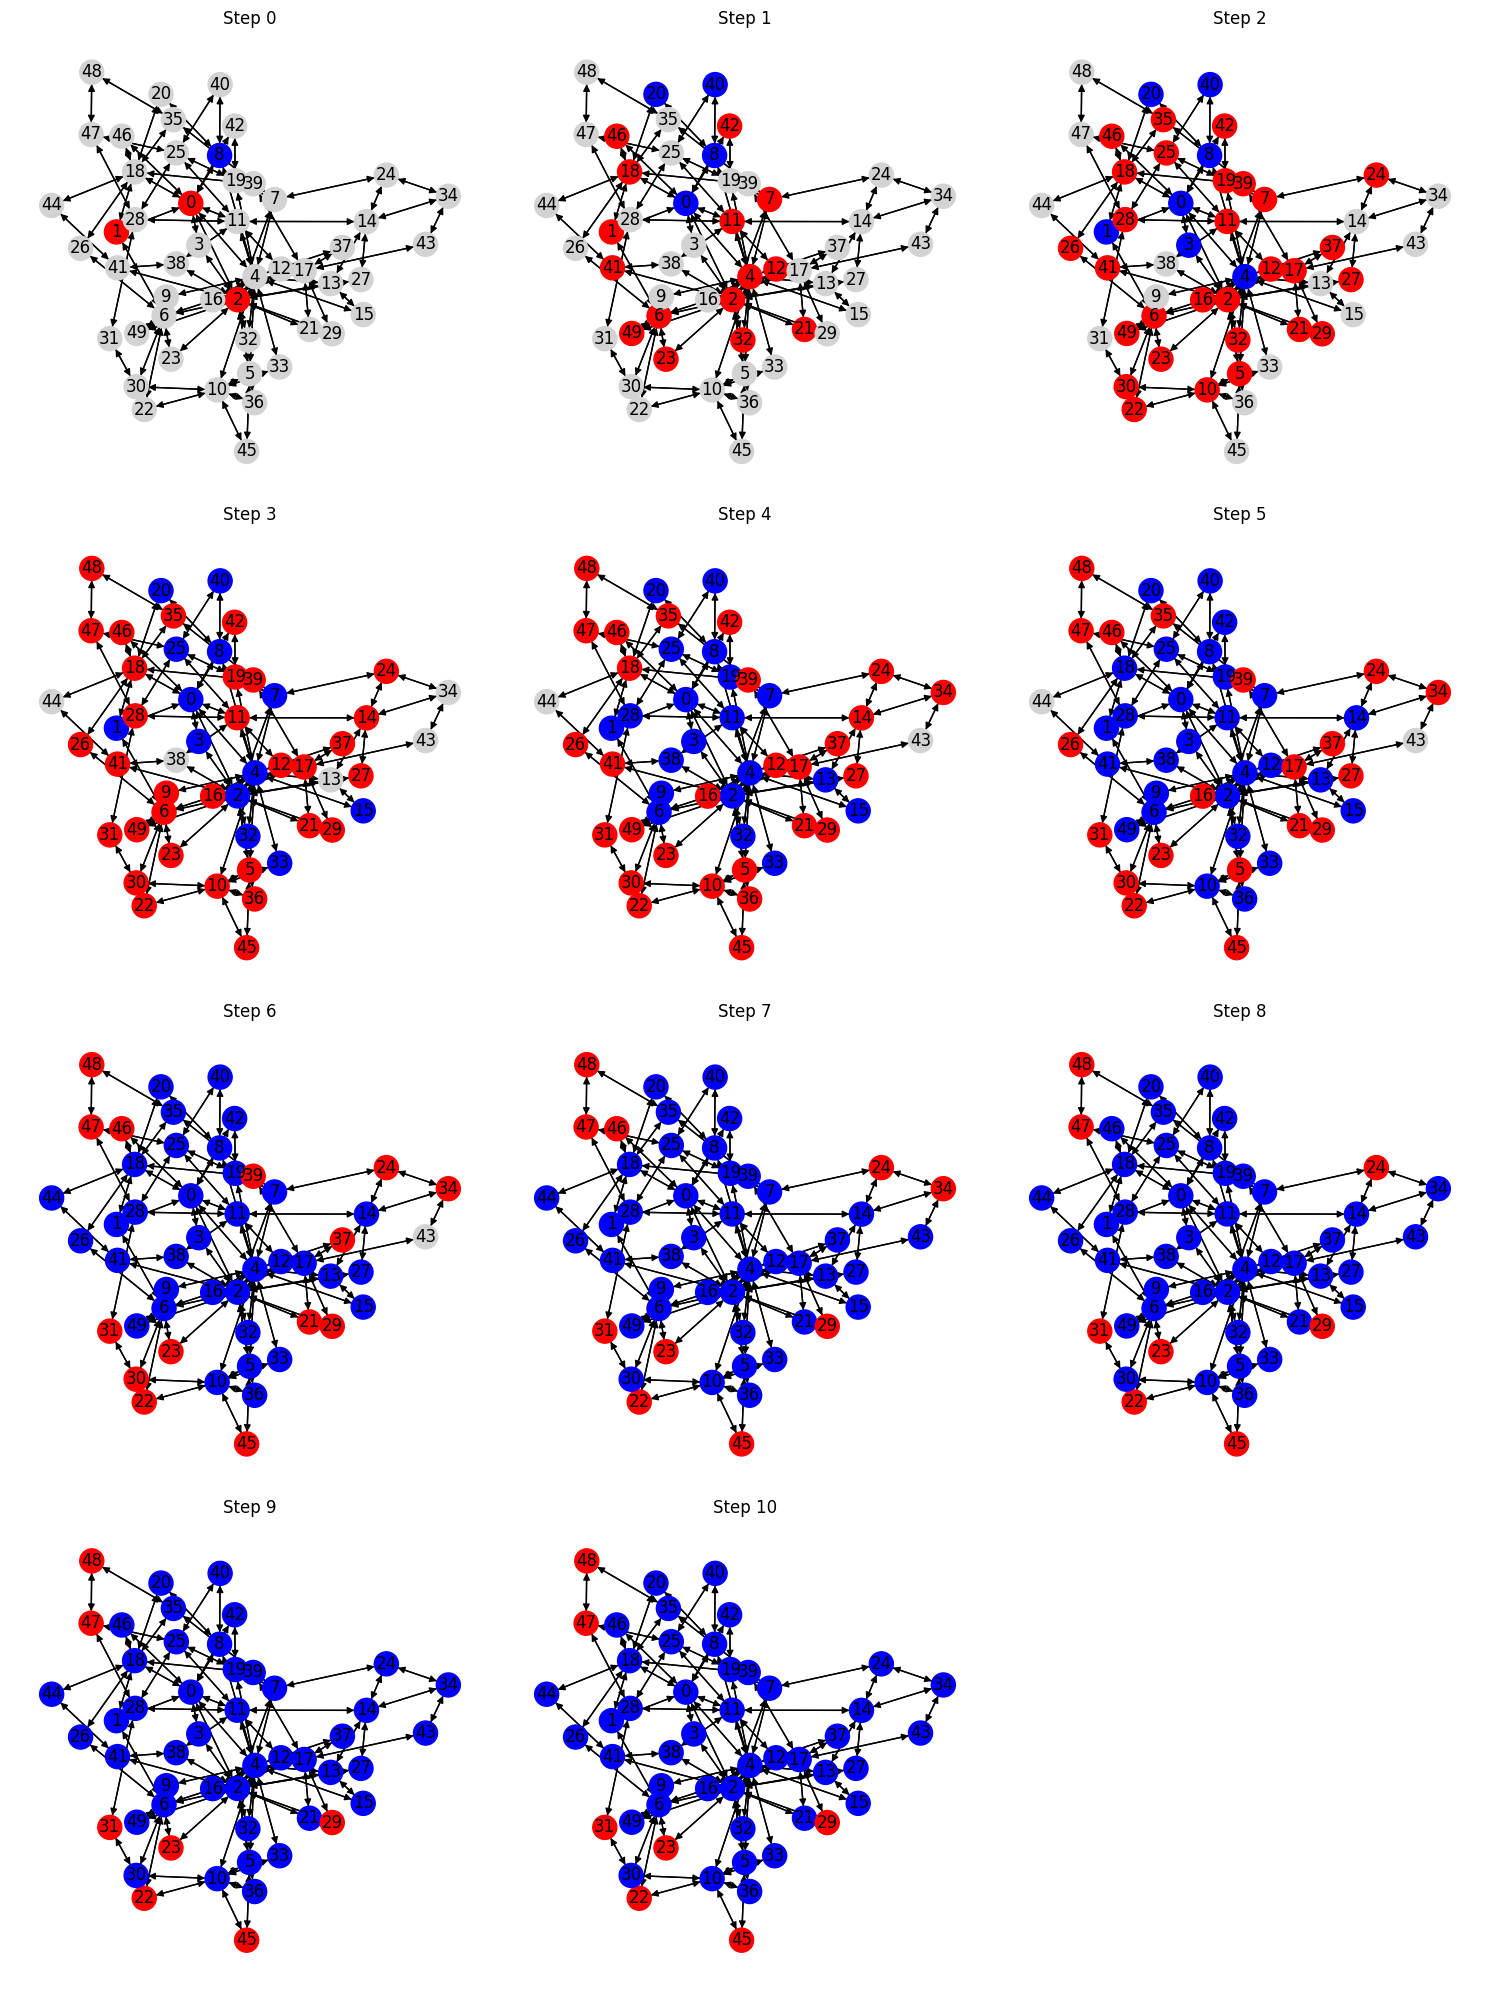

In [126]:
model_er = generate_and_run_model('barabasi_albert', num_nodes, steps, edge_prob=edge_prob, num_influencers=num_influencers, m=2)
display_model_graphs(model_er)